In [375]:
import numpy as np  #work with arrays
import pandas as pd  #data manipulation and analysis
import seaborn as sns #Data visualization
import plotly.express as px
import matplotlib.pyplot as plt #animated and interactive visualization
import warnings
warnings.filterwarnings("ignore")

In [376]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [377]:
df = pd.read_csv('student-mat.csv')

In [378]:
df = pd.DataFrame(df)
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [379]:
# rename column labels
df.columns = ['school','gender','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','travel_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','daily_alcohol_usage','weekend_alcohol_usage','health_status','absences','score1','score2','score3']

In [380]:
df['Passed'] = 'na'
df.loc[((df.score1 + df.score2 + df.score3)/3<= 20) , 'Passed'] = 'no' #Acess group of rows and columns by labels or boolean array
df.loc[((df.score1 + df.score2 + df.score3/3)> 20) , 'Passed'] = 'yes' 
df.head(5)

school gender  age address family_size parents_status  mother_education  \
0     GP      F   18       U         GT3              A                 4   
1     GP      F   17       U         GT3              T                 1   
2     GP      F   15       U         LE3              T                 1   
3     GP      F   15       U         GT3              T                 4   
4     GP      F   16       U         GT3              T                 3   

   father_education mother_job father_job  ... free_time go_out  \
0                 4    at_home    teacher  ...         3      4   
1                 1    at_home      other  ...         3      3   
2                 1    at_home      other  ...         3      2   
3                 2     health   services  ...         2      2   
4                 3      other      other  ...         3      2   

   daily_alcohol_usage  weekend_alcohol_usage  health_status absences score1  \
0                    1                      1              3        6      5   
1                    1                      1              3        4      5   
2                    2                      3              3       10      7   
3                    1                      1              5        2     15   
4                    1                      2              5        4      6   

  score2 score3 Passed  
0      6      6     no  
1      5      6     no  
2      8     10     no  
3     14     15    yes  
4     10     10     no  

[5 rows x 34 columns]

In [381]:
#DATA ANALYZING

In [382]:
#null check
df.isnull()

school  gender    age  address  family_size  parents_status  \
0     False   False  False    False        False           False   
1     False   False  False    False        False           False   
2     False   False  False    False        False           False   
3     False   False  False    False        False           False   
4     False   False  False    False        False           False   
..      ...     ...    ...      ...          ...             ...   
390   False   False  False    False        False           False   
391   False   False  False    False        False           False   
392   False   False  False    False        False           False   
393   False   False  False    False        False           False   
394   False   False  False    False        False           False   

     mother_education  father_education  mother_job  father_job  ...  \
0               False             False       False       False  ...   
1               False             False       False       False  ...   
2               False             False       False       False  ...   
3               False             False       False       False  ...   
4               False             False       False       False  ...   
..                ...               ...         ...         ...  ...   
390             False             False       False       False  ...   
391             False             False       False       False  ...   
392             False             False       False       False  ...   
393             False             False       False       False  ...   
394             False             False       False       False  ...   

     free_time  go_out  daily_alcohol_usage  weekend_alcohol_usage  \
0        False   False                False                  False   
1        False   False                False                  False   
2        False   False                False                  False   
3        False   False                False                  False   
4        False   False                False                  False   
..         ...     ...                  ...                    ...   
390      False   False                False                  False   
391      False   False                False                  False   
392      False   False                False                  False   
393      False   False                False                  False   
394      False   False                False                  False   

     health_status  absences  score1  score2  score3  Passed  
0            False     False   False   False   False   False  
1            False     False   False   False   False   False  
2            False     False   False   False   False   False  
3            False     False   False   False   False   False  
4            False     False   False   False   False   False  
..             ...       ...     ...     ...     ...     ...  
390          False     False   False   False   False   False  
391          False     False   False   False   False   False  
392          False     False   False   False   False   False  
393          False     False   False   False   False   False  
394          False     False   False   False   False   False  

[395 rows x 34 columns]

In [383]:
#Describe Categorical Data
df.describe(include='all')

school gender         age address family_size parents_status  \
count     395    395  395.000000     395         395            395   
unique      2      2         NaN       2           2              2   
top        GP      F         NaN       U         GT3              T   
freq      349    208         NaN     307         281            354   
mean      NaN    NaN   16.696203     NaN         NaN            NaN   
std       NaN    NaN    1.276043     NaN         NaN            NaN   
min       NaN    NaN   15.000000     NaN         NaN            NaN   
25%       NaN    NaN   16.000000     NaN         NaN            NaN   
50%       NaN    NaN   17.000000     NaN         NaN            NaN   
75%       NaN    NaN   18.000000     NaN         NaN            NaN   
max       NaN    NaN   22.000000     NaN         NaN            NaN   

        mother_education  father_education mother_job father_job  ...  \
count         395.000000        395.000000        395        395  ...   
unique               NaN               NaN          5          5  ...   
top                  NaN               NaN      other      other  ...   
freq                 NaN               NaN        141        217  ...   
mean            2.749367          2.521519        NaN        NaN  ...   
std             1.094735          1.088201        NaN        NaN  ...   
min             0.000000          0.000000        NaN        NaN  ...   
25%             2.000000          2.000000        NaN        NaN  ...   
50%             3.000000          2.000000        NaN        NaN  ...   
75%             4.000000          3.000000        NaN        NaN  ...   
max             4.000000          4.000000        NaN        NaN  ...   

         free_time      go_out  daily_alcohol_usage  weekend_alcohol_usage  \
count   395.000000  395.000000           395.000000             395.000000   
unique         NaN         NaN                  NaN                    NaN   
top            NaN         NaN                  NaN                    NaN   
freq           NaN         NaN                  NaN                    NaN   
mean      3.235443    3.108861             1.481013               2.291139   
std       0.998862    1.113278             0.890741               1.287897   
min       1.000000    1.000000             1.000000               1.000000   
25%       3.000000    2.000000             1.000000               1.000000   
50%       3.000000    3.000000             1.000000               2.000000   
75%       4.000000    4.000000             2.000000               3.000000   
max       5.000000    5.000000             5.000000               5.000000   

        health_status    absences      score1      score2      score3 Passed  
count      395.000000  395.000000  395.000000  395.000000  395.000000    395  
unique            NaN         NaN         NaN         NaN         NaN      2  
top               NaN         NaN         NaN         NaN         NaN    yes  
freq              NaN         NaN         NaN         NaN         NaN    288  
mean         3.554430    5.708861   10.908861   10.713924   10.415190    NaN  
std          1.390303    8.003096    3.319195    3.761505    4.581443    NaN  
min          1.000000    0.000000    3.000000    0.000000    0.000000    NaN  
25%          3.000000    0.000000    8.000000    9.000000    8.000000    NaN  
50%          4.000000    4.000000   11.000000   11.000000   11.000000    NaN  
75%          5.000000    8.000000   13.000000   13.000000   14.000000    NaN  
max          5.000000   75.000000   19.000000   19.000000   20.000000    NaN  

[11 rows x 34 columns]

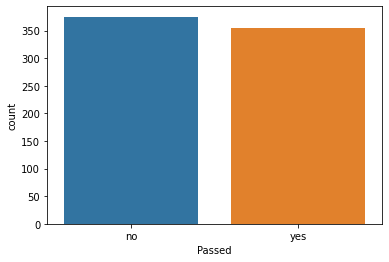

In [384]:
#DATA VISUALIZATION
#CountPlot for various columns
for i in df:
    if(df[i].nunique()<30):
        sns.countplot(x=df[i])
        plt.show()

In [385]:
#school
df["School_name"]=''
for i in range(len(df)):
    if df['school'][i]=='GP':
        df['School_name'][i]='GP'
    else:
        df['School_name'][i]='MS'
px.pie(data_frame = df, names = 'School_name', title = 'Percentage of Students studying in two different schools', hole= 0.2)

In [386]:
#Gender
df["S_gender"]=''
for i in range(len(df)):
    if df['gender'][i]=='M':
        df['S_gender'][i]='Male'
    else:
        df['S_gender'][i]='Female'
px.pie(data_frame = df, names = 'S_gender', title = 'Percentage of Students Gender', hole= 0.2)

In [387]:
#Address
df["l_area_is"]=''
for i in range(len(df)):
    if df['address'][i]=='U':
        df['l_area_is'][i]='Urban'
    else:
        df['l_area_is'][i]='Rural'
px.pie(data_frame = df, names = 'l_area_is', title = 'Percentage of Living Area of Students', hole= 0.2)

In [388]:
#Family_size
df["family_size_is"]=''
for i in range(len(df)):
    if df['family_size'][i]=='LE3':
        df['family_size_is'][i]='Less Than or Equal To Three'
    else:
        df['family_size_is'][i]='Greater Than Three'
px.pie(data_frame = df, names = 'family_size_is', title = 'Percentage of Family Size of Student', hole= 0.2)

In [389]:
#Parent's Status
df["parent_is"]=''
for i in range(len(df)):
    if df['parents_status'][i]=='T':
        df['parent_is'][i]='Living Together'
    else:
        df['parent_is'][i]='Apart'
px.pie(data_frame = df, names = 'parent_is', title = 'Percentage of Parent Status', hole= 0.2)

In [390]:
#Mother's Education
df["medu_is"]=''
for i in range(len(df)):
    if df['mother_education'][i]==0:
        df['medu_is'][i]='None'
    elif df['mother_education'][i]==1:
        df['medu_is'][i]='Primary Education'
    elif df['mother_education'][i]==2:
        df['medu_is'][i]='5 to 9 Grade'
    elif df['mother_education'][i]==3:
        df['medu_is'][i]='Secondary Education'
    else:
        df['medu_is'][i]='Higher Education'
px.pie(data_frame = df, names = 'medu_is', title = 'Percentage of Mother Education', hole= 0.2)


In [391]:
#Father's Education
df["fedu_is"]=''
for i in range(len(df)):
    if df['father_education'][i]==0:
        df['fedu_is'][i]='None'
    elif df['father_education'][i]==1:
        df['fedu_is'][i]='Primary Education'
    elif df['father_education'][i]==2:
        df['fedu_is'][i]='5 to 9 Grade'
    elif df['father_education'][i]==3:
        df['fedu_is'][i]='Secondary Education'
    else:
        df['fedu_is'][i]='Higher Education'
px.pie(data_frame = df, names = 'fedu_is', title = 'Percentage of Father Education', hole= 0.2)


In [392]:
#Mother's Job
df["mjob_is"]=''
for i in range(len(df)):
    if df['mother_job'][i]=='teacher':
        df['mjob_is'][i]='Teacher'
    elif df['mother_job'][i]=='health':
        df['mjob_is'][i]='Health Care'
    elif df['mother_job'][i]=='services':
        df['mjob_is'][i]='Civil Service'
    elif df['mother_job'][i]=='at_home':
        df['mjob_is'][i]='At Home'
    else:
        df['mjob_is'][i]='Other'
px.pie(data_frame = df, names = 'mjob_is', title = 'Percentage of different jobs of Mothers', hole= 0.2)


In [393]:
#Father's Job
df["fjob_is"]=''
for i in range(len(df)):
    if df['father_job'][i]=='teacher':
        df['fjob_is'][i]='Teacher'
    elif df['father_job'][i]=='health':
        df['fjob_is'][i]='Healthe Care'
    elif df['father_job'][i]=='services':
        df['fjob_is'][i]='Civil Services'
    elif df['father_job'][i]=='at_home':
        df['fjob_is'][i]='At Home'
    else:
        df['fjob_is'][i]='Other'
px.pie(data_frame = df, names = 'fjob_is', title = 'Percentage of different jobs of Father', hole= 0.2)


In [394]:
#Reason To Join Institutes
df["reason_is"]=''
for i in range(len(df)):
    if df['reason'][i]=='home':
        df['reason_is'][i]='Close To Home'
    elif df['reason'][i]=='reputation':
        df['reason_is'][i]='School Reputation'
    elif df['reason'][i]=='course':
        df['reason_is'][i]='Course Preferences'
    else:
        df['reason_is'][i]='Other'
px.pie(data_frame = df, names = 'reason_is', title = 'Percentage of different reason to join Institutes', hole= 0.2)


In [395]:
#Guardian
df["guardian_is"]=''
for i in range(len(df)):
    if df['guardian'][i]=='mother':
        df['guardian_is'][i]='Mother'
    elif df['guardian'][i]=='father':
        df['guardian_is'][i]='Father'
    else:
        df['guardian_is'][i]='Other'
px.pie(data_frame = df, names = 'guardian_is', title = 'Percentage of different guardian of Students', hole= 0.2)


In [396]:
#Travel Time
df["travel_time_is"]=''
for i in range(len(df)):
    if df['travel_time'][i]==1:
        df['travel_time_is'][i]='Less Than 15 Minutes'
    elif df['travel_time'][i]==2:
        df['travel_time_is'][i]='15 to 30 Minutes'
    elif df['travel_time'][i]==3:
        df['travel_time_is'][i]='30 Minutes to 1 Hour'
    else:
        df['travel_time_is'][i]='More Than 1 Hour'
px.pie(data_frame = df, names = 'travel_time_is', title = 'Percentage of Travel Times of Students', hole= 0.2)


In [397]:
#Study Time
df["study_time_is"]=''
for i in range(len(df)):
    if df['study_time'][i]==1:
        df['study_time_is'][i]='Less Than 2 Hours'
    elif df['study_time'][i]==2:
        df['study_time_is'][i]='2 to 5 Hours'
    elif df['study_time'][i]==3:
        df['study_time_is'][i]='5 to 10 Hours'
    else:
        df['study_time_is'][i]='More Than 10 Hours'
px.pie(data_frame = df, names = 'study_time_is', title = 'Percentage of Study Times of Students', hole= 0.2)


In [398]:
#failures
df["has_failed"]=''
for i in range(len(df)):
    if df['failures'][i]==0:
        df['has_failed'][i]='Never'
    elif df['failures'][i]==1:
        df['has_failed'][i]='One Time'
    elif df['failures'][i]==2:
        df['has_failed'][i]='Two Times'
    else:
        df['has_failed'][i]='Three Times'
px.pie(data_frame = df, names='has_failed', title = 'Percentage of times Students have Failed In Exam', hole= 0.2)


In [399]:
#school_support
df["s_support_is"]=''
for i in range(len(df)):
    if df['school_support'][i]=='no':
        df['s_support_is'][i]='No'
    else:
        df['s_support_is'][i]='Yes'
px.pie(data_frame = df, names = 's_support_is', title = 'Percentage of Students have school support', hole= 0.2)

In [400]:
#family_support
df["f_support_is"]=''
for i in range(len(df)):
    if df['family_support'][i]=='no':
        df['f_support_is'][i]='No'
    else:
        df['f_support_is'][i]='Yes'
px.pie(data_frame = df, names = 'f_support_is', title = 'Percentage of Students have Family Support', hole= 0.2)

In [401]:
#extra_educational_support
df["e_edu_sup"]=''
for i in range(len(df)):
    if df['paid_classes'][i]=='no':
        df['e_edu_sup'][i]='No'
    else:
        df['e_edu_sup'][i]='Yes'
px.pie(data_frame = df, names = 'e_edu_sup', title = 'Percentage of Students have Extra Educational Support', hole= 0.2)

In [402]:
#Extra_activities
df["extra_activities"]=''
for i in range(len(df)):
    if df['activities'][i]=='no':
        df['extra_activities'][i]='No'
    else:
        df['extra_activities'][i]='Yes'
px.pie(data_frame = df, names = 'extra_activities', title = 'Percentage of Students Participate in Extra Activities', hole= 0.2)

In [403]:
#Nursery
df["studied_nursery"]=''
for i in range(len(df)):
    if df['nursery'][i]=='no':
        df['studied_nursery'][i]='No'
    else:
        df['studied_nursery'][i]='Yes'
px.pie(data_frame = df, names = 'studied_nursery', title = 'Percentage of Students Studied Nursery class', hole= 0.2)

In [404]:
#Desire of Higher Edication
df["desire_h_edu"]=''
for i in range(len(df)):
    if df['desire_higher_edu'][i]=='no':
        df['desire_h_edu'][i]='No'
    else:
        df['desire_h_edu'][i]='Yes'
px.pie(data_frame = df, names = 'desire_h_edu', title = 'Percentage of Students have desire to go for Higher Edication', hole= 0.2)

In [405]:
#Internet
df["i_facility"]=''
for i in range(len(df)):
    if df['internet'][i]=='no':
        df['i_facility'][i]='No'
    else:
        df['i_facility'][i]='Yes'
px.pie(data_frame = df, names = 'i_facility', title = 'Percentage of Students have Internet Facility', hole= 0.2)

In [406]:
#Romantic
df["is_romantic"]=''
for i in range(len(df)):
    if df['romantic'][i]=='no':
        df['is_romantic'][i]='No'
    else:
        df['is_romantic'][i]='Yes'
px.pie(data_frame = df, names = 'is_romantic', title = 'Percentage of Students are Romantic', hole= 0.2)

In [407]:
#Faimly_Quality
df["f_quality_is"]=''
for i in range(len(df)):
    if df['family_quality'][i]==1:
        df['f_quality_is'][i]='Bad'
    elif df['family_quality'][i]==2:
        df['f_quality_is'][i]='Good'
    elif df['family_quality'][i]==3:
        df['f_quality_is'][i]='Average'
    elif df['family_quality'][i]==4:
        df['f_quality_is'][i]='Very Good'
    else:
        df['f_quality_is'][i]='Excellent'
px.pie(data_frame = df, names = 'f_quality_is', title = 'Percentage of Family quaility of Students', hole= 0.2)


In [408]:
#Free_Time
df["f_time_is"]=''
for i in range(len(df)):
    if df['free_time'][i]==1:
        df['f_time_is'][i]='Very Low'
    elif df['family_quality'][i]==2:
        df['f_time_is'][i]='Low'
    elif df['free_time'][i]==3:
        df['f_time_is'][i]='Average'
    elif df['free_time'][i]==4:
        df['f_time_is'][i]='High'
    else:
        df['f_time_is'][i]='Very High'
px.pie(data_frame = df, names = 'f_time_is', title = 'Percentage of Free Time of Students', hole= 0.2)


In [409]:
#GO_OUT
df["gout"]=''
for i in range(len(df)):
    if df['go_out'][i]==1:
        df['gout'][i]='Very Less'
    elif df['go_out'][i]==2:
        df['gout'][i]='Less'
    elif df['go_out'][i]==3:
        df['gout'][i]='SomeTimes'
    elif df['go_out'][i]==4:
        df['gout'][i]='More'
    else:
        df['gout'][i]='Frquently'
px.pie(data_frame = df, names = 'gout', title = 'Percentage of Students Go_Out', hole= 0.2)

In [410]:
#Daily_Alcohol_Usage
df["d_a_usage_is"]=''
for i in range(len(df)):
    if df['daily_alcohol_usage'][i]==1:
        df['d_a_usage_is'][i]='Very Low'
    elif df['daily_alcohol_usage'][i]==2:
        df['d_a_usage_is'][i]='Low'
    elif df['daily_alcohol_usage'][i]==3:
        df['d_a_usage_is'][i]='Average'
    elif df['daily_alcohol_usage'][i]==4:
        df['d_a_usage_is'][i]='High'
    else:
        df['d_a_usage_is'][i]='Very High'
px.pie(data_frame = df, names = 'd_a_usage_is', title = 'Percentage of Alcohol consumption by Students in a Daily basis.', hole= 0.2)


In [411]:
#Weekend_Alcohol_Usage
df["w_a_usage_is"]=''
for i in range(len(df)):
    if df['weekend_alcohol_usage'][i]==1:
        df['w_a_usage_is'][i]='Very Less'
    elif df['weekend_alcohol_usage'][i]==2:
        df['w_a_usage_is'][i]='Low'
    elif df['weekend_alcohol_usage'][i]==3:
        df['w_a_usage_is'][i]='Average'
    elif df['weekend_alcohol_usage'][i]==4:
        df['w_a_usage_is'][i]='High'
    else:
        df['w_a_usage_is'][i]='Very High'
px.pie(data_frame = df, names = 'w_a_usage_is', title = 'Percentage of Alcohol consumption by Students on Weekend.', hole= 0.2)


In [412]:
#Health Status
df["h_status_is"]=''
for i in range(len(df)):
    if df['health_status'][i]==1:
        df['h_status_is'][i]='Very Bad'
    elif df['health_status'][i]==2:
        df['h_status_is'][i]='Bad'
    elif df['health_status'][i]==3:
        df['h_status_is'][i]='Average'
    elif df['health_status'][i]==4:
        df['h_status_is'][i]='Good'
    else:
        df['h_status_is'][i]='Very Good'
px.pie(data_frame = df, names = 'h_status_is', title = 'Percentage of Heath Status of Students.', hole= 0.2)


In [413]:
#Passed
df["std_pass"]=''
for i in range(len(df)):
    if df['Passed'][i]=='no':
        df['std_pass'][i]='No'
    else:
        df['std_pass'][i]='Yes'
px.pie(data_frame = df, names = 'std_pass', title = 'Percentage of Students have Passed', hole= 0.2)

In [414]:
#plot of student status
df['Passed'].value_counts()

yes    288
no     107
Name: Passed, dtype: int64

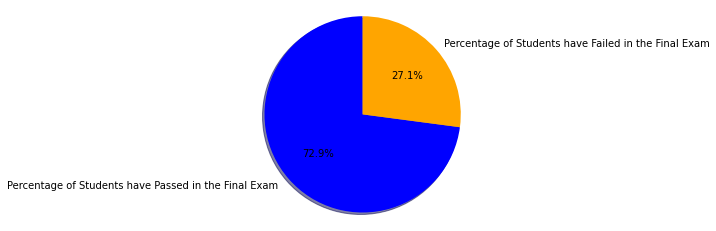

In [415]:
labels = 'Percentage of Students have Passed in the Final Exam ', 'Percentage of Students have Failed in the Final Exam' 
sizes = [288,107]
colors=['blue','orange']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [416]:
#Training set
df1 = df.loc[:,['school','gender','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','travel_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','daily_alcohol_usage','weekend_alcohol_usage','health_status','absences','score1','score2','score3','Passed']]
df1

school gender  age address family_size parents_status  mother_education  \
0       GP      F   18       U         GT3              A                 4   
1       GP      F   17       U         GT3              T                 1   
2       GP      F   15       U         LE3              T                 1   
3       GP      F   15       U         GT3              T                 4   
4       GP      F   16       U         GT3              T                 3   
..     ...    ...  ...     ...         ...            ...               ...   
390     MS      M   20       U         LE3              A                 2   
391     MS      M   17       U         LE3              T                 3   
392     MS      M   21       R         GT3              T                 1   
393     MS      M   18       R         LE3              T                 3   
394     MS      M   19       U         LE3              T                 1   

     father_education mother_job father_job  ... free_time go_out  \
0                   4    at_home    teacher  ...         3      4   
1                   1    at_home      other  ...         3      3   
2                   1    at_home      other  ...         3      2   
3                   2     health   services  ...         2      2   
4                   3      other      other  ...         3      2   
..                ...        ...        ...  ...       ...    ...   
390                 2   services   services  ...         5      4   
391                 1   services   services  ...         4      5   
392                 1      other      other  ...         5      3   
393                 2   services      other  ...         4      1   
394                 1      other    at_home  ...         2      3   

     daily_alcohol_usage  weekend_alcohol_usage  health_status absences  \
0                      1                      1              3        6   
1                      1                      1              3        4   
2                      2                      3              3       10   
3                      1                      1              5        2   
4                      1                      2              5        4   
..                   ...                    ...            ...      ...   
390                    4                      5              4       11   
391                    3                      4              2        3   
392                    3                      3              3        3   
393                    3                      4              5        0   
394                    3                      3              5        5   

    score1 score2 score3 Passed  
0        5      6      6     no  
1        5      5      6     no  
2        7      8     10     no  
3       15     14     15    yes  
4        6     10     10     no  
..     ...    ...    ...    ...  
390      9      9      9    yes  
391     14     16     16    yes  
392     10      8      7    yes  
393     11     12     10    yes  
394      8      9      9     no  

[395 rows x 34 columns]

In [417]:
#We can drop score1,score2, and score3 features because it is not a computational value

In [418]:
df1.drop(["score1","score2","score3"], axis=1,inplace=True)

In [419]:
df1 = pd.DataFrame(df1)
df1.head()

school gender  age address family_size parents_status  mother_education  \
0     GP      F   18       U         GT3              A                 4   
1     GP      F   17       U         GT3              T                 1   
2     GP      F   15       U         LE3              T                 1   
3     GP      F   15       U         GT3              T                 4   
4     GP      F   16       U         GT3              T                 3   

   father_education mother_job father_job  ... internet romantic  \
0                 4    at_home    teacher  ...       no       no   
1                 1    at_home      other  ...      yes       no   
2                 1    at_home      other  ...      yes       no   
3                 2     health   services  ...      yes      yes   
4                 3      other      other  ...       no       no   

   family_quality  free_time  go_out daily_alcohol_usage  \
0               4          3       4                   1   
1               5          3       3                   1   
2               4          3       2                   2   
3               3          2       2                   1   
4               4          3       2                   1   

  weekend_alcohol_usage health_status absences Passed  
0                     1             3        6     no  
1                     1             3        4     no  
2                     3             3       10     no  
3                     1             5        2    yes  
4                     2             5        4     no  

[5 rows x 31 columns]

In [420]:
# mapping strings to numeric values:
def numerical_data():
    df1['school'] = df1['school'].map({'GP': 0, 'MS': 1})
    df1['gender'] = df1['gender'].map({'M': 0, 'F': 1})
    df1['address'] = df1['address'].map({'U': 0, 'R': 1})
    df1['family_size'] = df1['family_size'].map({'LE3': 0, 'GT3': 1})
    df1['parents_status'] = df1['parents_status'].map({'T': 0, 'A': 1})
    df1['mother_job'] = df1['mother_job'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df1['father_job'] = df1['father_job'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df1['reason'] = df1['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
    df1['guardian'] = df1['guardian'].map({'mother': 0, 'father': 1, 'other': 2})
    df1['school_support'] = df1['school_support'].map({'no': 0, 'yes': 1})
    df1['family_support'] = df1['family_support'].map({'no': 0, 'yes': 1})
    df1['paid_classes'] = df1['paid_classes'].map({'no': 0, 'yes': 1})
    df1['activities'] = df1['activities'].map({'no': 0, 'yes': 1})
    df1['nursery'] = df1['nursery'].map({'no': 0, 'yes': 1})
    df1['desire_higher_edu'] = df1['desire_higher_edu'].map({'no': 0, 'yes': 1})
    df1['internet'] = df1['internet'].map({'no': 0, 'yes': 1})
    df1['romantic'] = df1['romantic'].map({'no': 0, 'yes' : 1})
    df1['Passed'] = df1['Passed'].map({'no': 0, 'yes': 1})
   

In [421]:
# All values in numerical after calling numerical_data() function
numerical_data()
df1

school  gender  age  address  family_size  parents_status  \
0         0       1   18        0            1               1   
1         0       1   17        0            1               0   
2         0       1   15        0            0               0   
3         0       1   15        0            1               0   
4         0       1   16        0            1               0   
..      ...     ...  ...      ...          ...             ...   
390       1       0   20        0            0               1   
391       1       0   17        0            0               0   
392       1       0   21        1            1               0   
393       1       0   18        1            0               0   
394       1       0   19        0            0               0   

     mother_education  father_education  mother_job  father_job  ...  \
0                   4                 4           3           0  ...   
1                   1                 1           3           4  ...   
2                   1                 1           3           4  ...   
3                   4                 2           1           2  ...   
4                   3                 3           4           4  ...   
..                ...               ...         ...         ...  ...   
390                 2                 2           2           2  ...   
391                 3                 1           2           2  ...   
392                 1                 1           4           4  ...   
393                 3                 2           2           4  ...   
394                 1                 1           4           3  ...   

     internet  romantic  family_quality  free_time  go_out  \
0           0         0               4          3       4   
1           1         0               5          3       3   
2           1         0               4          3       2   
3           1         1               3          2       2   
4           0         0               4          3       2   
..        ...       ...             ...        ...     ...   
390         0         0               5          5       4   
391         1         0               2          4       5   
392         0         0               5          5       3   
393         1         0               4          4       1   
394         1         0               3          2       3   

     daily_alcohol_usage  weekend_alcohol_usage  health_status  absences  \
0                      1                      1              3         6   
1                      1                      1              3         4   
2                      2                      3              3        10   
3                      1                      1              5         2   
4                      1                      2              5         4   
..                   ...                    ...            ...       ...   
390                    4                      5              4        11   
391                    3                      4              2         3   
392                    3                      3              3         3   
393                    3                      4              5         0   
394                    3                      3              5         5   

     Passed  
0         0  
1         0  
2         0  
3         1  
4         0  
..      ...  
390       1  
391       1  
392       1  
393       1  
394       0  

[395 rows x 31 columns]

Text(0.5, 1.0, 'Correlation Heatmap')

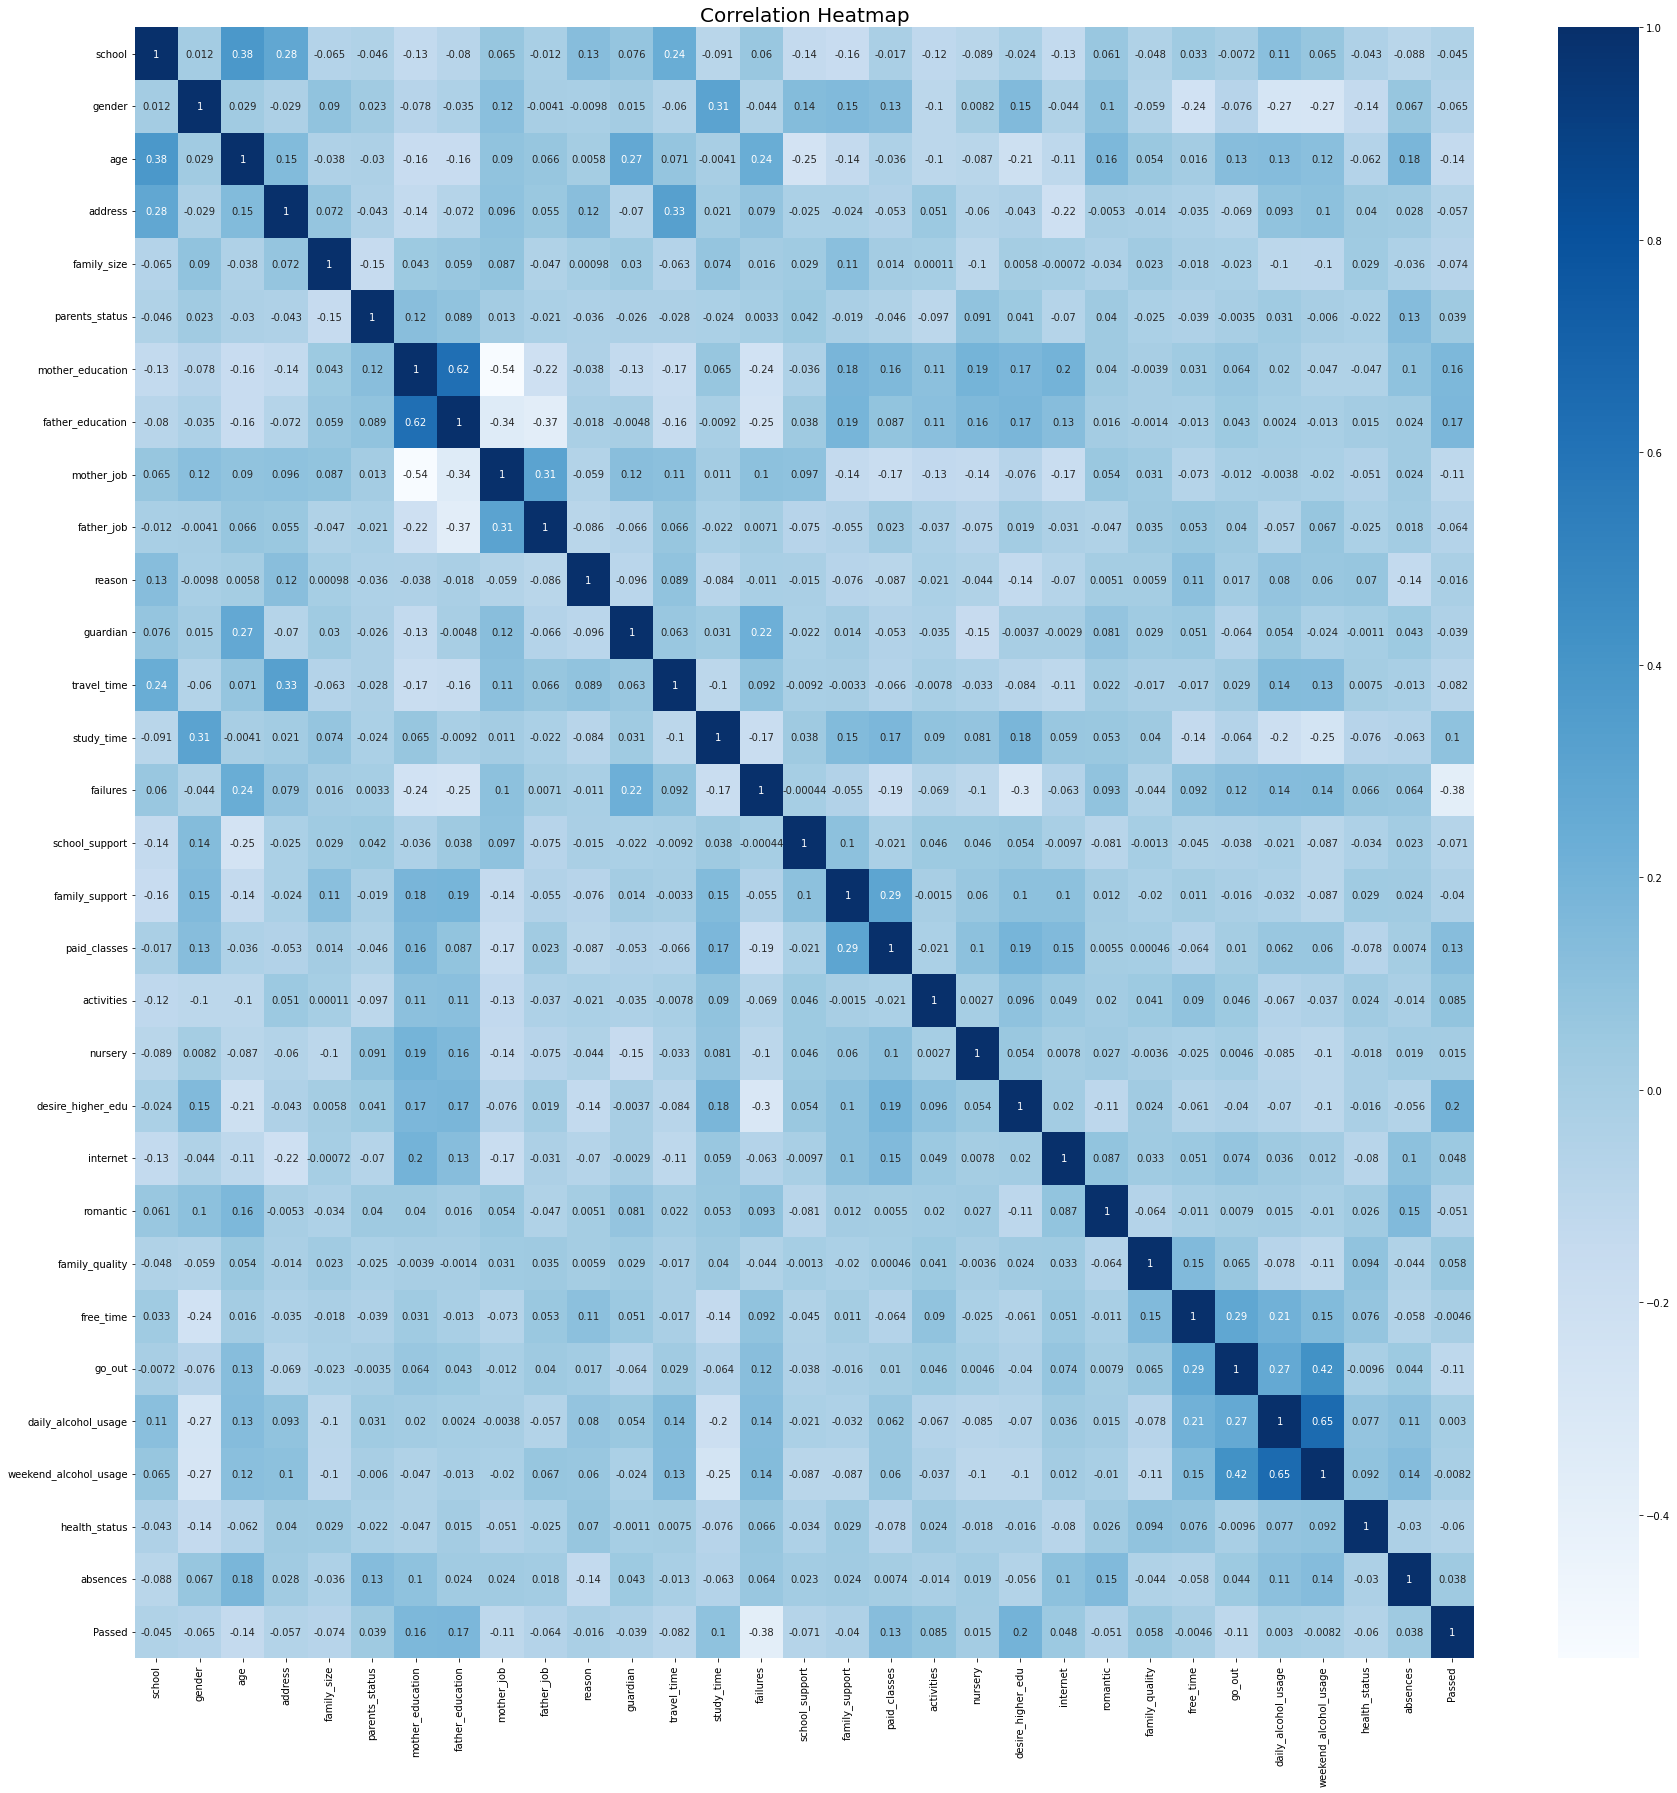

In [422]:
# see correlation between variables through a correlation heatmap
corr = df1.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title('Correlation Heatmap', fontsize=20)

<Figure size 576x864 with 0 Axes>

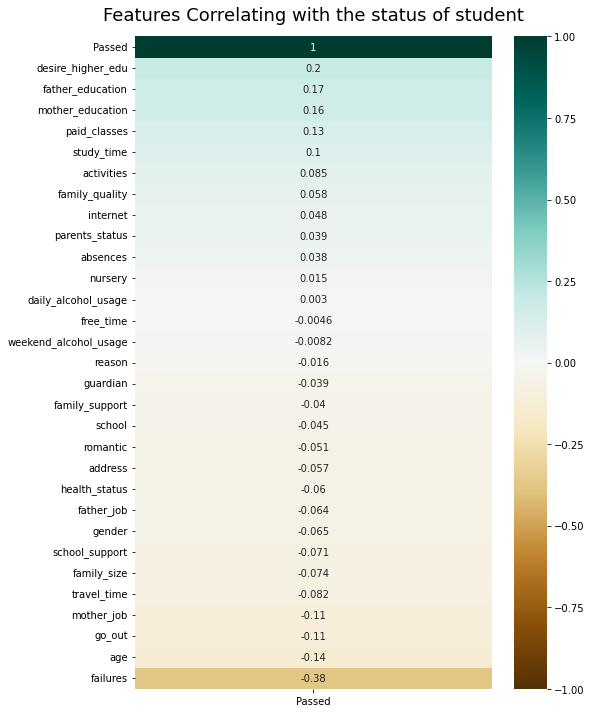

<Figure size 576x864 with 0 Axes>

In [423]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df1.corr()[['Passed',]].sort_values(by='Passed', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the status of student', fontdict={'fontsize':18}, pad=16);
plt.figure(figsize=(8, 12))

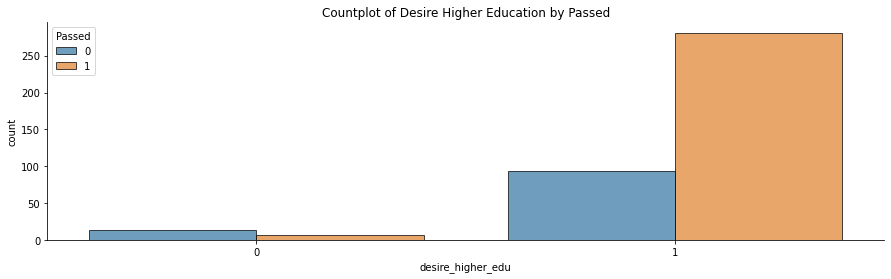

In [424]:
plt.figure(figsize=[15,4])
sns.countplot(x='desire_higher_edu', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Desire Higher Education by Passed")
plt.show()

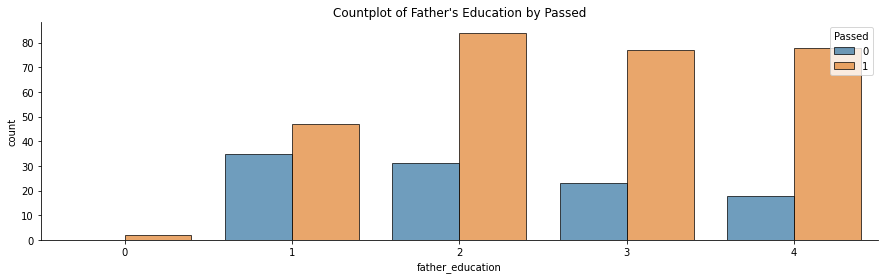

In [425]:
plt.figure(figsize=[15,4])
sns.countplot(x='father_education', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Father's Education by Passed")
plt.show()

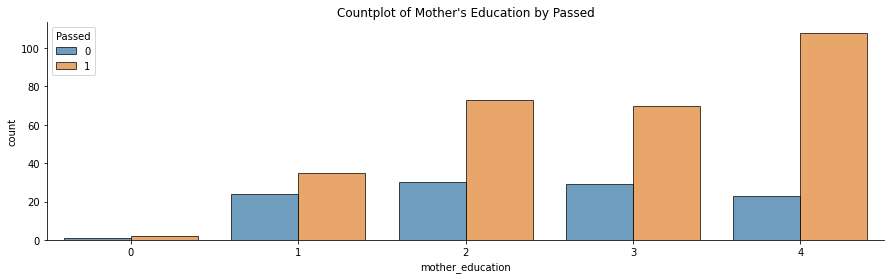

In [426]:
plt.figure(figsize=[15,4])
sns.countplot(x='mother_education', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Mother's Education by Passed")
plt.show()

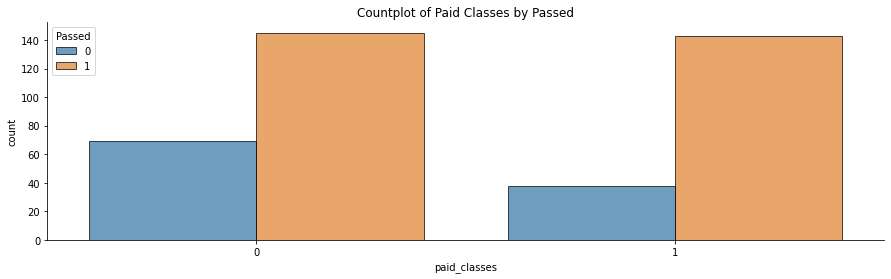

In [427]:
plt.figure(figsize=[15,4])
sns.countplot(x='paid_classes', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Paid Classes by Passed")
plt.show()

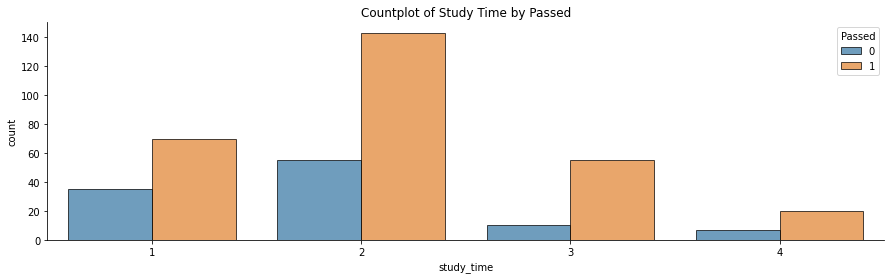

In [428]:
plt.figure(figsize=[15,4])
sns.countplot(x='study_time', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Study Time by Passed")
plt.show()

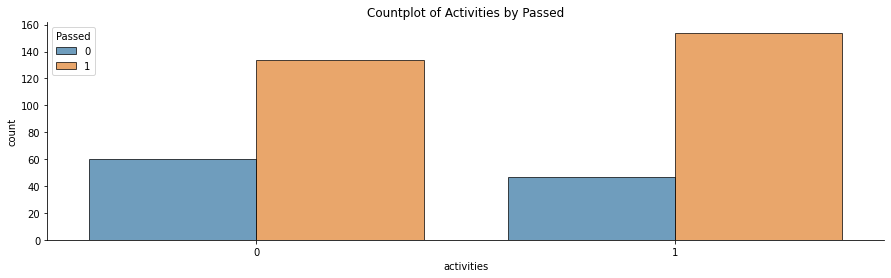

In [429]:
plt.figure(figsize=[15,4])
sns.countplot(x='activities', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Activities by Passed")
plt.show()

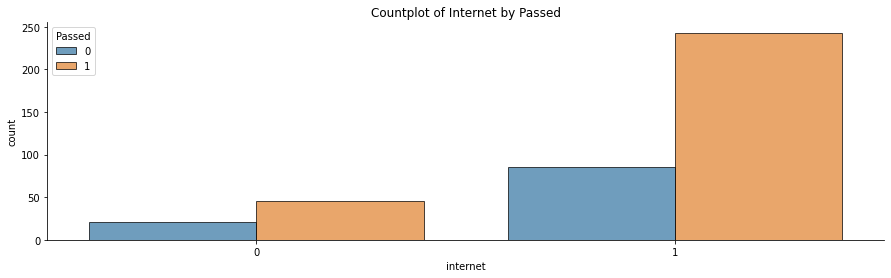

In [430]:
plt.figure(figsize=[15,4])
sns.countplot(x='internet', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Internet by Passed")
plt.show()

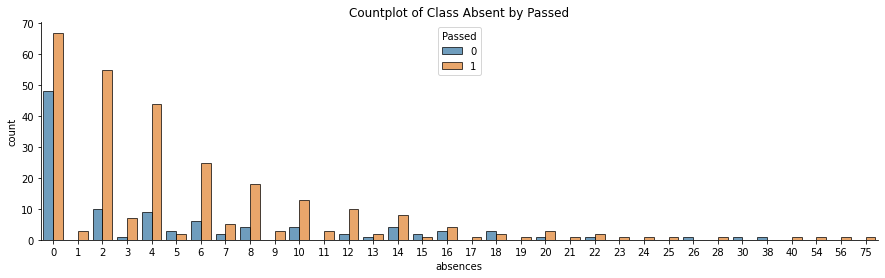

In [431]:
plt.figure(figsize=[15,4])
sns.countplot(x='absences', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Class Absent by Passed")
plt.show()

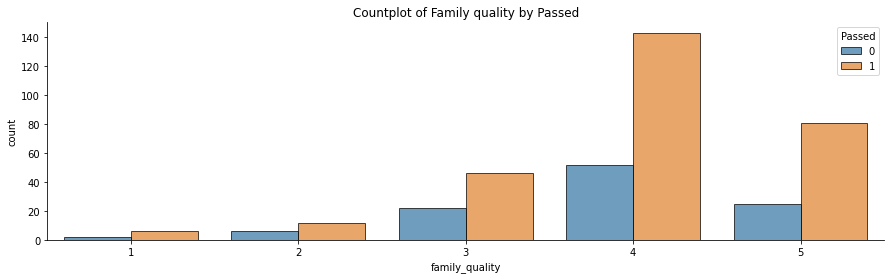

In [432]:
plt.figure(figsize=[15,4])
sns.countplot(x='family_quality', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Family quality by Passed")
plt.show()

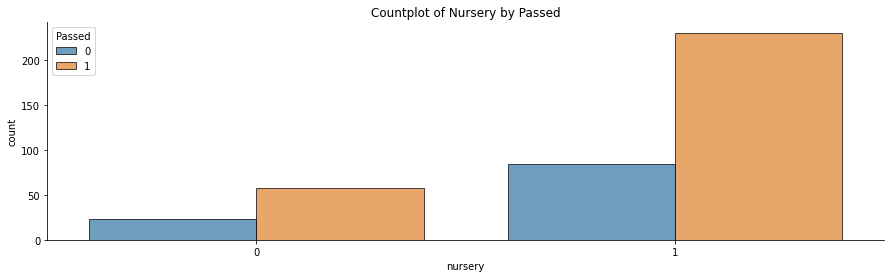

In [433]:
plt.figure(figsize=[15,4])
sns.countplot(x='nursery', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Nursery by Passed")
plt.show()

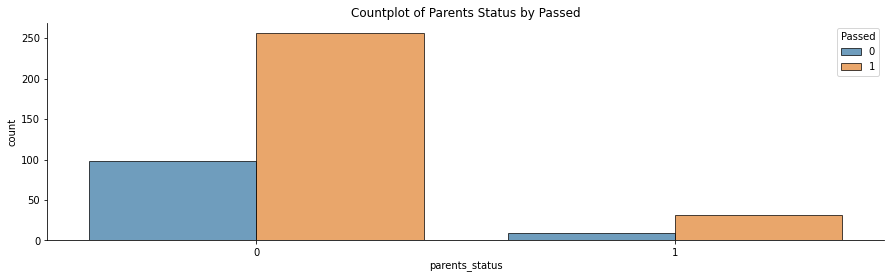

In [434]:
plt.figure(figsize=[15,4])
sns.countplot(x='parents_status', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Parents Status by Passed")
plt.show()

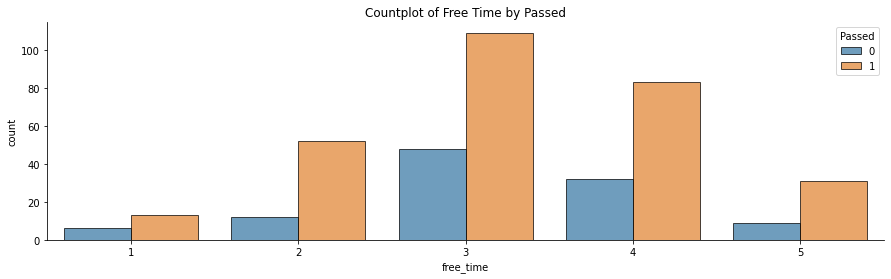

In [435]:
plt.figure(figsize=[15,4])
sns.countplot(x='free_time', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Free Time by Passed")
plt.show()

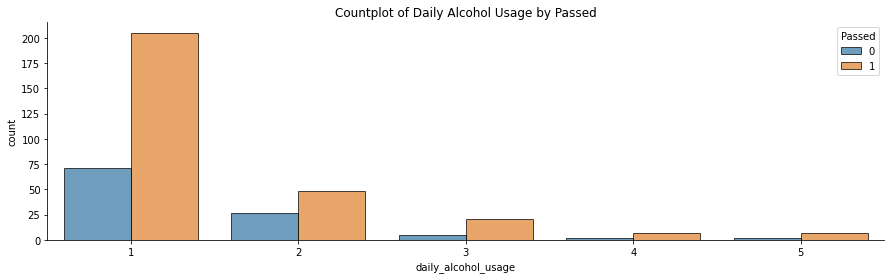

In [436]:
plt.figure(figsize=[15,4])
sns.countplot(x='daily_alcohol_usage', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Daily Alcohol Usage by Passed")
plt.show()

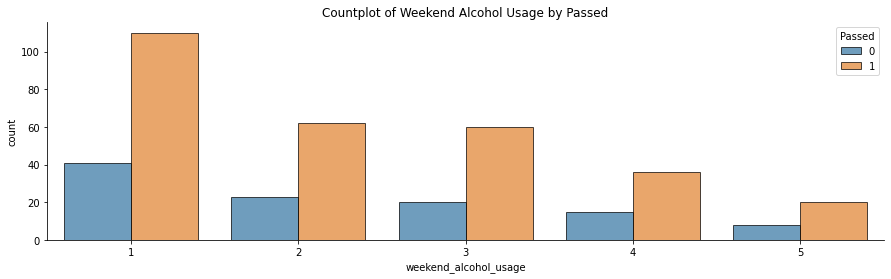

In [437]:
plt.figure(figsize=[15,4])
sns.countplot(x='weekend_alcohol_usage', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Weekend Alcohol Usage by Passed")
plt.show()

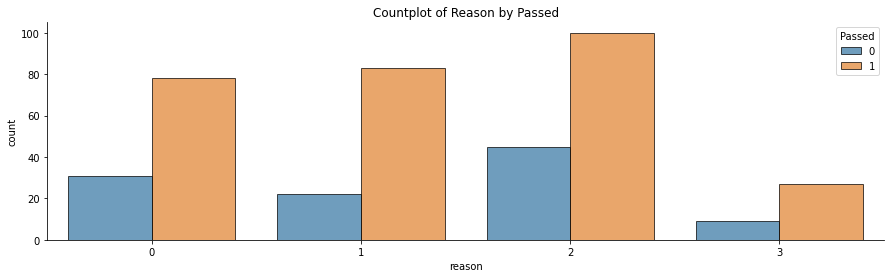

In [438]:
plt.figure(figsize=[15,4])
sns.countplot(x='reason', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Reason by Passed")
plt.show()

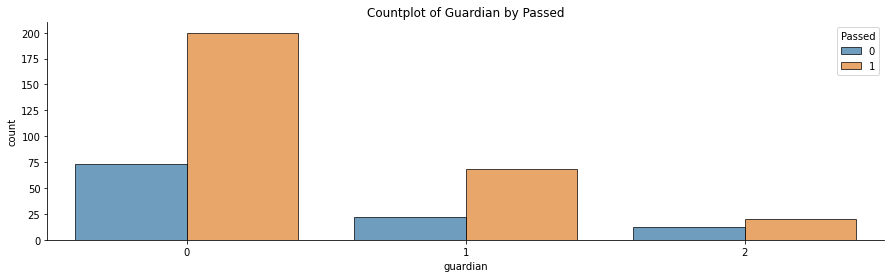

In [439]:
plt.figure(figsize=[15,4])
sns.countplot(x='guardian', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Guardian by Passed")
plt.show()

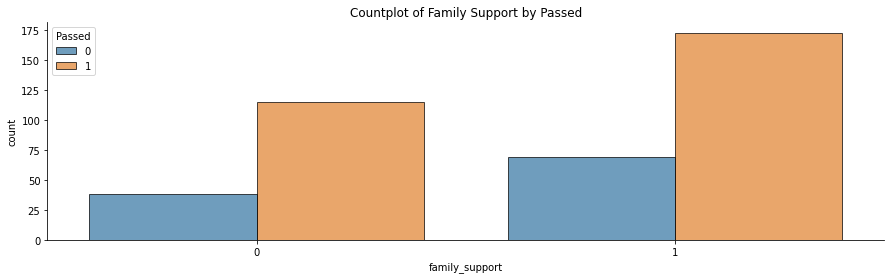

In [440]:
plt.figure(figsize=[15,4])
sns.countplot(x='family_support', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Family Support by Passed")
plt.show()

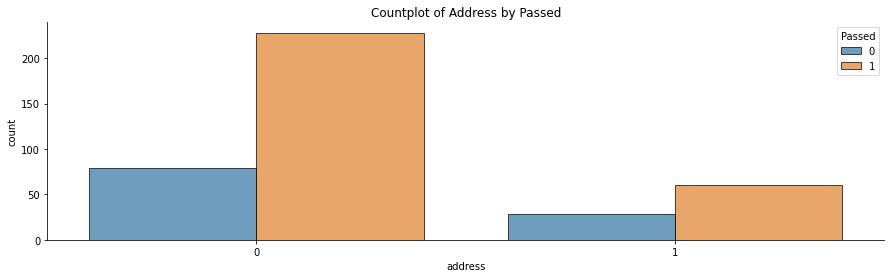

In [441]:
plt.figure(figsize=[15,4])
sns.countplot(x='address', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Address by Passed")
plt.show()

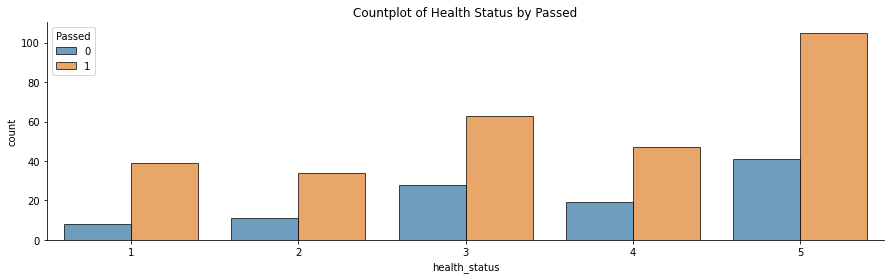

In [442]:
plt.figure(figsize=[15,4])
sns.countplot(x='health_status', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Health Status by Passed")
plt.show()

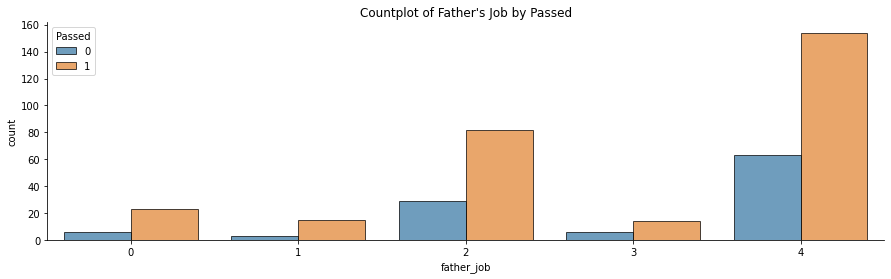

In [443]:
plt.figure(figsize=[15,4])
sns.countplot(x='father_job', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Father's Job by Passed")
plt.show()

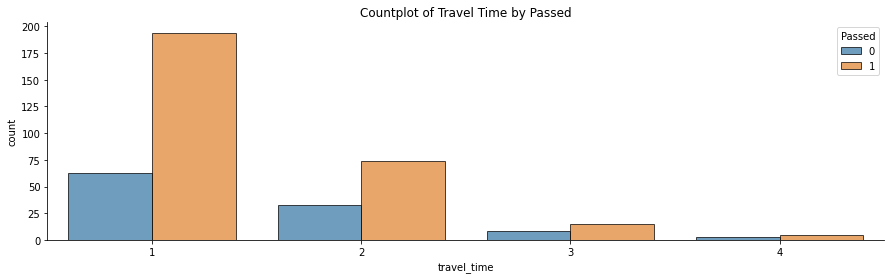

In [444]:
plt.figure(figsize=[15,4])
sns.countplot(x='travel_time', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Travel Time by Passed")
plt.show()

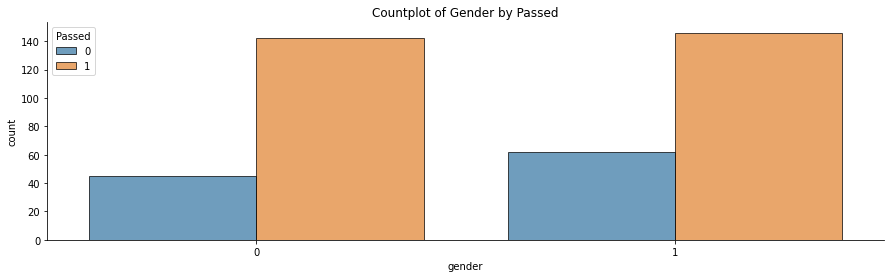

In [445]:
plt.figure(figsize=[15,4])
sns.countplot(x='gender', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Gender by Passed")
plt.show()

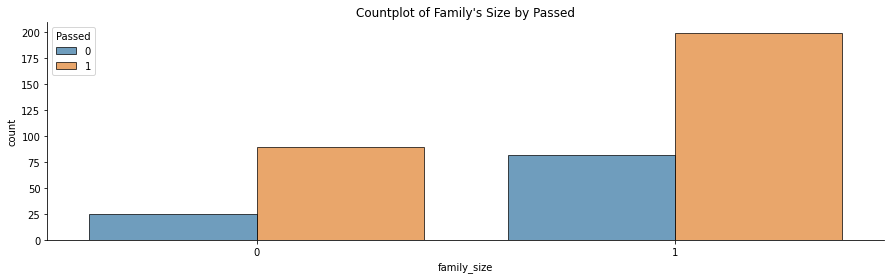

In [446]:
plt.figure(figsize=[15,4])
sns.countplot(x='family_size', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Family's Size by Passed")
plt.show()

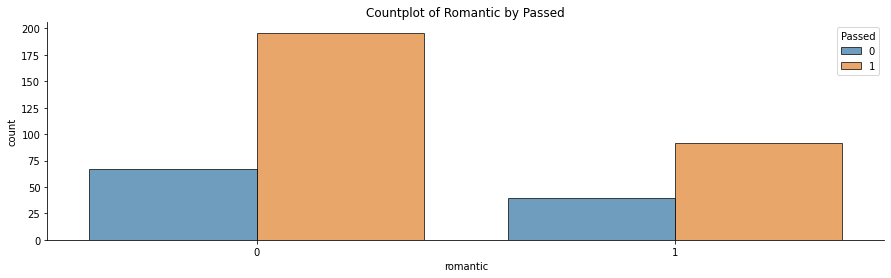

In [447]:
plt.figure(figsize=[15,4])
sns.countplot(x='romantic', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Romantic by Passed")
plt.show()

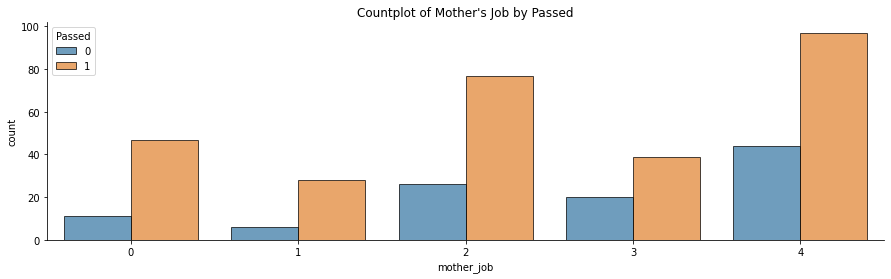

In [448]:
plt.figure(figsize=[15,4])
sns.countplot(x='mother_job', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Mother's Job by Passed")
plt.show()

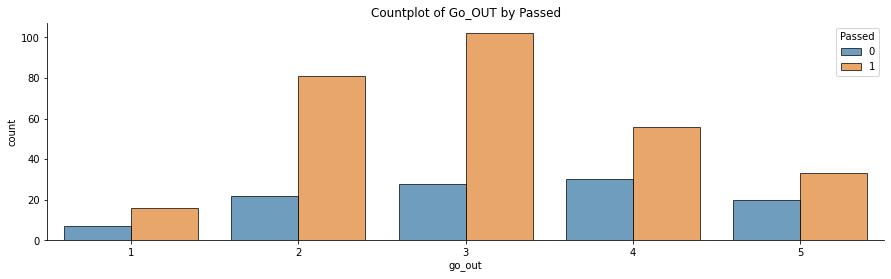

In [449]:
plt.figure(figsize=[15,4])
sns.countplot(x='go_out', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Go_OUT by Passed")
plt.show()

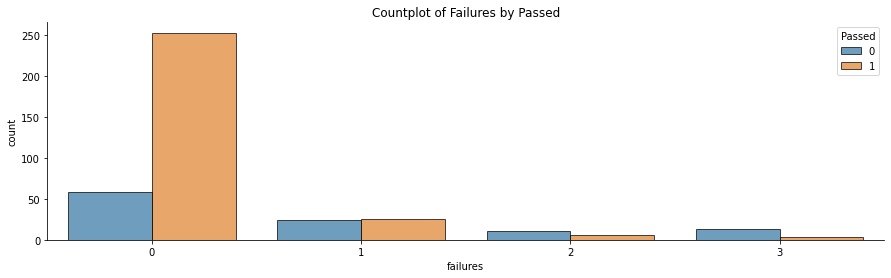

In [450]:
plt.figure(figsize=[15,4])
sns.countplot(x='failures', hue='Passed',edgecolor="black", alpha=0.7, data=df1)
sns.despine()
plt.title("Countplot of Failures by Passed")
plt.show()

In [451]:
#PREDICTION

In [452]:
#:total all row -1 excluding passed (training)
x = df1.iloc[:, :-1].values #features selection (All Rows, All Columns except last one)
y = df1.iloc[:, -1].values #target value ( All rows of last columns)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=0)

In [453]:
#logistic Regression
log=LogisticRegression()
log.fit(x_train,y_train)
print("Training score of Logistic Regression is: {}".format(log.score(x_train,y_train)*100))
y_predlog=log.predict(x_test)
print(y_predlog)
acrr=accuracy_score(y_test,y_predlog)*100
print("Accuracy of Logistic Regression Classifier is: {}%".format(acrr))
print("Confusion matrix Logistic Regression Classifier is: \n{}".format(confusion_matrix(y_test,y_predlog)))
print("{}".format(classification_report(y_test,y_predlog)))

Training score of Logistic Regression is: 80.07246376811594
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1]
Accuracy of Logistic Regression Classifier is: 73.10924369747899%
Confusion matrix Logistic Regression Classifier is: 
[[13 30]
 [ 2 74]]
              precision    recall  f1-score   support

           0       0.87      0.30      0.45        43
           1       0.71      0.97      0.82        76

    accuracy                           0.73       119
   macro avg       0.79      0.64      0.64       119
weighted avg       0.77      0.73      0.69       119



In [454]:
#SVM
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
svm.fit(x_train,y_train)
print("Training score of SVM is: {}".format(svm.score(x_train,y_train)*100))
y_pred_svm=svm.predict(x_test)
ac_svm=accuracy_score(y_test,y_pred_svm)*100
print("Accuracy of SVM is: {}".format(ac_svm))
print("Confusion matrix of SVM is: {}".format(confusion_matrix(y_test,y_pred_svm)))
print("{}".format(classification_report(y_test,y_pred_svm)))

Training score of GaussianNB is 79.34782608695652
Accuracy of Naive Bayes Classifier is: 70.58823529411765
Confusion matrix of Naive Bayes Classifier is:[[14 29]
 [ 6 70]]
              precision    recall  f1-score   support

           0       0.70      0.33      0.44        43
           1       0.71      0.92      0.80        76

    accuracy                           0.71       119
   macro avg       0.70      0.62      0.62       119
weighted avg       0.70      0.71      0.67       119



In [455]:
#Gussain NB
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
print("Training score of GaussianNB is {}".format(nb.score(x_train,y_train)*100))
y_pred=nb.predict(x_test)
ac_nb=accuracy_score(y_test,y_pred)*100
print("Accuracy of Naive Bayes Classifier is: {}".format(ac_nb))
print("Confusion matrix of Naive Bayes Classifier is:{}".format(confusion_matrix(y_test,y_pred)))
print("{}".format(classification_report(y_test,y_pred)))

Training score of SVM is: 86.59420289855072
Accuracy of SVM is: 68.0672268907563
Confusion matrix of SVM is: [[ 5 38]
 [ 0 76]]
              precision    recall  f1-score   support

           0       1.00      0.12      0.21        43
           1       0.67      1.00      0.80        76

    accuracy                           0.68       119
   macro avg       0.83      0.56      0.50       119
weighted avg       0.79      0.68      0.59       119



In [456]:
#Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
print("Training score of Bernoulli Naive Bayes is {}".format(bnb.score(x_train,y_train)*100))
y_pred_bnb=bnb.predict(x_test)
print(y_pred)
ac_bnb=accuracy_score(y_test,y_pred)*100
print("Accuracy of Bernoulli Naive Bayes Classifier is: {}".format(ac_bnb))
print("Confusion matrix of Bernoulli Naive Bayes Classifier is:{}".format(confusion_matrix(y_test,y_pred)))
print("{}".format(classification_report(y_test,y_pred_bnb)))

Training score of Bernoulli Naive Bayes is 74.27536231884058
[1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1
 0 1 1 1 1 1 1 1]
Accuracy of Bernoulli Naive Bayes Classifier is: 70.58823529411765
Confusion matrix of Bernoulli Naive Bayes Classifier is:[[14 29]
 [ 6 70]]
              precision    recall  f1-score   support

           0       0.78      0.33      0.46        43
           1       0.71      0.95      0.81        76

    accuracy                           0.72       119
   macro avg       0.75      0.64      0.64       119
weighted avg       0.74      0.72      0.69       119



In [457]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=300)
RF.fit(x_train,y_train)
print("Training score of Random Forest Classifier is: {}".format(RF.score(x_train,y_train)*100))
y_pred_RF=RF.predict(x_test)
ac_RF=accuracy_score(y_test,y_pred_RF)*100
print("Accuracy of Random Forest Classifier is: {}".format(ac_RF))
print("Confusion matrix of Random Forest Classifier is: {}".format(confusion_matrix(y_test,y_pred_RF)))
print("{}".format(classification_report(y_test,y_pred_RF)))

Training score of Random Forest Classifier is: 100.0
Accuracy of Random Forest Classifier is: 69.74789915966386
Confusion matrix of Random Forest Classifier is: [[ 9 34]
 [ 2 74]]
              precision    recall  f1-score   support

           0       0.82      0.21      0.33        43
           1       0.69      0.97      0.80        76

    accuracy                           0.70       119
   macro avg       0.75      0.59      0.57       119
weighted avg       0.73      0.70      0.63       119



   n_neighbors  train_accuracy  test_accuracy
0          100        0.860841       0.183393
1          200        0.859917       0.180025
2          300        0.861544       0.181621
3          400        0.867802       0.183171
4          500        0.866840       0.186443


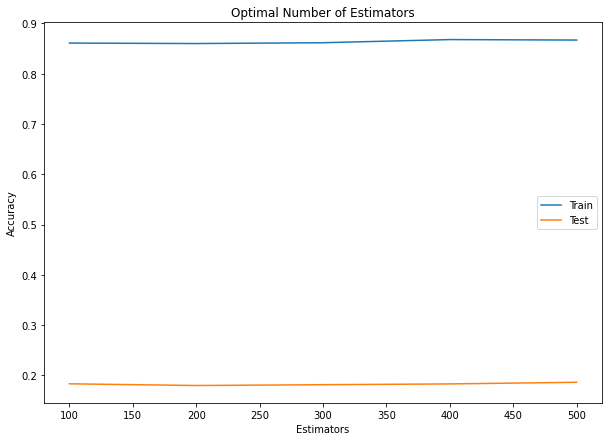

In [458]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
train_accuracy=[]
test_accuracy=[]
for i in range(100,600,100):
    c=RandomForestRegressor(n_estimators=i)
    c.fit(x_train,y_train)
    train_accuracy.append(c.score(x_train,y_train))
    test_accuracy.append(c.score(x_test,y_test))
frame=pd.DataFrame({"n_neighbors":range(100,600,100),"train_accuracy":train_accuracy,"test_accuracy":test_accuracy})
frame
plt.figure(figsize=(10,7))
plt.plot(range(100,600,100),frame["train_accuracy"],label="Train")
plt.plot(range(100,600,100),frame["test_accuracy"],label="Test")
plt.title("Optimal Number of Estimators")
plt.xlabel("Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print(frame)

In [459]:
#SGD
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
print("Training score of SGD Classifier is: {}".format(sgd.score(x_train,y_train)*100))
y_pred_sgd=sgd.predict(x_test)
ac_sgd=accuracy_score(y_test,y_pred_sgd)*100
print("Accuracy of SGD Classifier is: {}".format(ac_sgd))
print("Confusion matrix of SGD classifier is: {}".format(confusion_matrix(y_test,y_pred_sgd)))
print("{}".format(classification_report(y_test,y_pred_sgd)))

Training score of SGD Classifier is: 73.91304347826086
Accuracy of SGD Classifier is: 68.90756302521008
Confusion matrix of SGD classifier is: [[15 28]
 [ 9 67]]
              precision    recall  f1-score   support

           0       0.62      0.35      0.45        43
           1       0.71      0.88      0.78        76

    accuracy                           0.69       119
   macro avg       0.67      0.62      0.62       119
weighted avg       0.68      0.69      0.66       119



In [460]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor(random_state=0)
DTR.fit(x_train,y_train)
print("Training score of DecisionTreeRegressor is: {}".format(DTR.score(x_train,y_train)*100))
y_pred_DTR=DTR.predict(x_test)
ac_DTR=accuracy_score(y_test,y_pred_DTR)*100
print("Accuracy of Decision Tree Regressor is: {}".format(ac_DTR))
print("Confusion matrix of Decision Tree Regressor is: {}".format(confusion_matrix(y_test,y_pred_DTR)))
print("{}".format(classification_report(y_test,y_pred_DTR)))

Training score of DecisionTreeRegressor is: 100.0
Accuracy of Decision Tree Regressor is: 64.70588235294117
Confusion matrix of Decision Tree Regressor is: [[16 27]
 [15 61]]
              precision    recall  f1-score   support

           0       0.52      0.37      0.43        43
           1       0.69      0.80      0.74        76

    accuracy                           0.65       119
   macro avg       0.60      0.59      0.59       119
weighted avg       0.63      0.65      0.63       119



In [466]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DTG=DecisionTreeClassifier(criterion = 'gini')
DTG.fit(x_train,y_train)
print("Training score of DecisionTreeClassifier is: {}".format(DTG.score(x_train,y_train)*100))
y_pred_DTG=DTG.predict(x_test)
ac_DTG=accuracy_score(y_test,y_pred_DTG)*100
print("Accuracy of Decision Tree Classifier is: {}".format(ac_DTG))
print("Confusion matrix of Decision Tree Classifier is: {}".format(confusion_matrix(y_test,y_pred_DTG)))
print("{}".format(classification_report(y_test,y_pred_DTG)))

Training score of DecisionTreeClassifier is: 100.0
Accuracy of Decision Tree Classifier is: 63.86554621848739
Confusion matrix of Decision Tree Classifier is: [[17 26]
 [17 59]]
              precision    recall  f1-score   support

           0       0.50      0.40      0.44        43
           1       0.69      0.78      0.73        76

    accuracy                           0.64       119
   macro avg       0.60      0.59      0.59       119
weighted avg       0.62      0.64      0.63       119



In [467]:
#Decision Tree ID3
from sklearn.tree import DecisionTreeClassifier
DTI=DecisionTreeClassifier(criterion = "entropy")
DTI.fit(x_train,y_train)
print("Training score of DecisionTreeClassifier ID3 is: {}".format(DT.score(x_train,y_train)*100))
y_pred_DTI=DTI.predict(x_test)
ac_DTI=accuracy_score(y_test,y_pred_DTI)*100
print("Accuracy of Decision Tree Classifier ID3 is: {}".format(ac_DTI))
print("Confusion matrix of Decision Tree Classifier ID3 is: {}".format(confusion_matrix(y_test,y_pred_DTI)))
print("{}".format(classification_report(y_test,y_pred_DTI)))

Training score of DecisionTreeClassifier ID3 is: 100.0
Accuracy of Decision Tree Classifier ID3 is: 72.26890756302521
Confusion matrix of Decision Tree Classifier ID3 is: [[18 25]
 [ 8 68]]
              precision    recall  f1-score   support

           0       0.69      0.42      0.52        43
           1       0.73      0.89      0.80        76

    accuracy                           0.72       119
   macro avg       0.71      0.66      0.66       119
weighted avg       0.72      0.72      0.70       119



In [468]:
#Decision Tree C 4.5
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
print("Training score of DecisionTreeClassifier C4.5 is: {}".format(DT.score(x_train,y_train)*100))
y_pred_DTC=DTC.predict(x_test)
ac_DTC=accuracy_score(y_test,y_pred_DTC)*100
print("Accuracy of Decision Tree Classifier is: {}".format(ac_DTC))
print("Confusion matrix of Decision Tree Classifier is: {}".format(confusion_matrix(y_test,y_pred_DTC)))
print("{}".format(classification_report(y_test,y_pred_DTC)))

Training score of DecisionTreeClassifier C4.5 is: 100.0
Accuracy of Decision Tree Classifier is: 68.0672268907563
Confusion matrix of Decision Tree Classifier is: [[19 24]
 [14 62]]
              precision    recall  f1-score   support

           0       0.58      0.44      0.50        43
           1       0.72      0.82      0.77        76

    accuracy                           0.68       119
   macro avg       0.65      0.63      0.63       119
weighted avg       0.67      0.68      0.67       119



In [472]:
#Classifiers
classifiers=["LogisticRegression","SVM","GaussianNB","BernoulliaNB","RandomForestClassifier","SGDClassifier","DecisionTreeRegressor","DecisionTreeClassifierGiniID3","DecisionTreeClassifierEntropyID3","DecisionTreeClassifierC4.5"]
accuracy_=[acrr,ac_svm,ac_nb,ac_bnb,ac_RF,ac_sgd,ac_DTR,ac_DTG,ac_DTI,ac_DTC]
df_ac=pd.DataFrame({'Model':classifiers,"accuracy":accuracy_})
px.histogram(data_frame=df_ac,x="Model",y="accuracy")

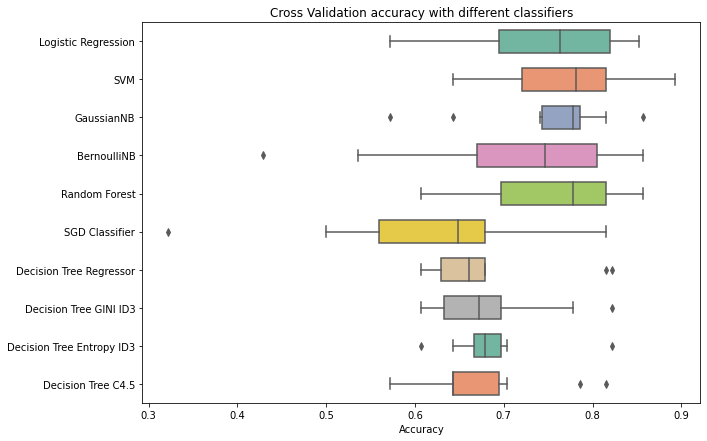

In [473]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits = 10)
xyz = []
accuracy = []

classifiers=["Logistic Regression","SVM","GaussianNB","BernoulliNB","Random Forest","SGD Classifier","Decision Tree Regressor","Decision Tree GINI ID3","Decision Tree Entropy ID3","Decision Tree C4.5"]
models=[LogisticRegression(),SVC(kernel='rbf'),GaussianNB(),BernoulliNB(),RandomForestClassifier(n_estimators=300,random_state=0),SGDClassifier(),DecisionTreeRegressor(),DecisionTreeClassifier(),DecisionTreeClassifier(),DecisionTreeClassifier()]

for i in models:
    model = i
    cv_result=cross_val_score(model,x_train,y_train,cv=kfold,scoring="accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)
    
cv_models_datafeame= pd.DataFrame(xyz, index = classifiers)
cv_models_datafeame.columns = ['CV Mean']
cv_models_datafeame
cv_models_datafeame.sort_values(['CV Mean'], ascending =[0])

box = pd.DataFrame(accuracy, index = [classifiers])
boxT = box.T
plt.figure(figsize = (10,7))
ax = sns.boxplot(data = boxT, orient = "h", palette = "Set2", width = 0.6)
ax.set_yticklabels(classifiers)
ax.set_title('Cross Validation accuracy with different classifiers')
ax.set_xlabel('Accuracy')

plt.show()


In [474]:
y_predlog=log.predict(x_test)
y_train_log=log.predict(x_train)
y_predlog

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [475]:
confusion_matrix = pd.DataFrame({'Actual': y_test, 'Predicted' : y_predlog})
confusion_matrix

Actual  Predicted
0         1          1
1         1          1
2         1          1
3         1          1
4         1          1
..      ...        ...
114       0          1
115       0          1
116       1          1
117       0          1
118       1          1

[119 rows x 2 columns]

In [476]:
#Summarization Of Dataset(Prifiling)
import pandas_profiling as pp
profile = pp.ProfileReport(df1, title="Student Performance Dataset")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]